# Laboratorio 8

### Gabriel Alejandro Vicente Lorenzo 20498

### Codigo proporcionado del Laboratorio 7 usado para el Laboratorio 8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [6]:
path = r'.\malimg_dataset\malimg_paper_dataset_imgs'

In [7]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [8]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [9]:
imgs, labels = next(familias)

In [10]:
imgs.shape

(9339, 64, 64, 3)

In [11]:
labels.shape

(9339, 25)

In [12]:

def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

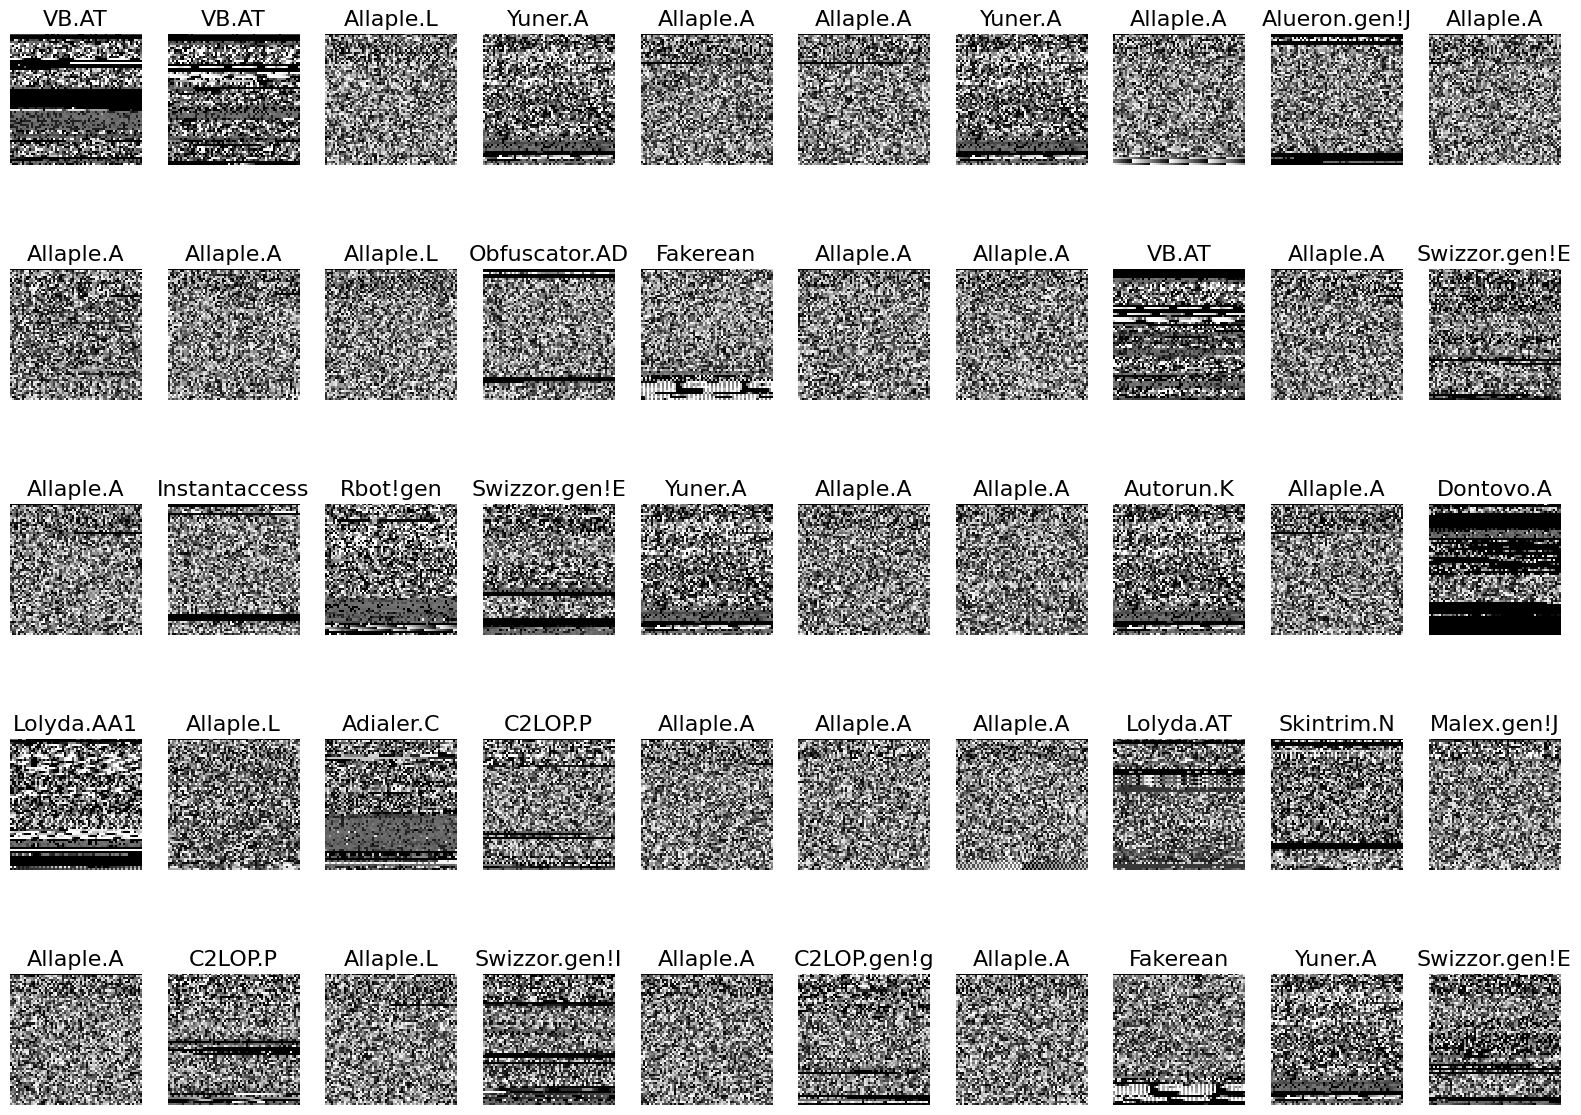

In [13]:

plots(imgs, titles = labels)

### Primera parte
Se utilizará el dataset proporcionado en Canvas (maligm_dataset.zip), que contiene imágenes en
formato .PNG de 25 familias distintas de malware. Debe realizarse el pre-procesamiento
especialmente en el conteo de observaciones por familia. Considere prescindir de familias que tengan
pocas observaciones. Plotee las imágenes de malware.
Tip: Utilice el jupyter proporcionado de guía para separa las familias de malware.
Luego construya una red neuronal con las capas/función de activación/optimizador que considere
convenientes. Trabaje con 70% entrenamiento y un 30% pruebas, con el número de épocas que
considere conveniente (siempre que no ocurra sobreajuste). Muestra las métricas del modelo. Guarde
su modelo.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Desarrollo de una red neuronal'

# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.3, random_state=42)

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')  # 25 clases
])

# Compilación del modelo
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

# Guardar el modelo
model.save("modelo_malware.h5")

Epoch 1/10
205/205 [==============================] - 21s 96ms/step - loss: 2.5035 - accuracy: 0.5928 - val_loss: 0.6526 - val_accuracy: 0.7787
Epoch 2/10
205/205 [==============================] - 21s 101ms/step - loss: 0.4889 - accuracy: 0.8527 - val_loss: 0.5262 - val_accuracy: 0.8262
Epoch 3/10
205/205 [==============================] - 20s 99ms/step - loss: 0.2836 - accuracy: 0.9168 - val_loss: 0.2272 - val_accuracy: 0.9368
Epoch 4/10
205/205 [==============================] - 20s 96ms/step - loss: 0.1624 - accuracy: 0.9506 - val_loss: 0.1623 - val_accuracy: 0.9529
Epoch 5/10
205/205 [==============================] - 22s 107ms/step - loss: 0.1223 - accuracy: 0.9622 - val_loss: 0.1823 - val_accuracy: 0.9554
Epoch 6/10
205/205 [==============================] - 24s 119ms/step - loss: 0.1163 - accuracy: 0.9639 - val_loss: 0.1905 - val_accuracy: 0.9543
Epoch 7/10
205/205 [==============================] - 24s 115ms/step - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.1634 - val_accur

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.save("modelo_malware")

INFO:tensorflow:Assets written to: modelo_malware\assets


INFO:tensorflow:Assets written to: modelo_malware\assets


### Segunda parte

El laboratorio consiste en el desarrollo de dos ataques (distintos) y la implementación de la defensa
contra dichos ataques. Se pueden utilizar los mismos ataques que en el laboratorio 7.



### Ataque Original 1: DEEP FOOL

#### Categoria: ataques de evasión

#### Defensa Aplicada: Suavizado de Entradas

En este enfoque defensivo, se empleó la técnica de suavizado de entradas, consistente en aplicar un filtro de suavizado gaussiano a las imágenes de entrada previo a su procesamiento por el modelo para la generación de imágenes adversariales. Este procedimiento busca mitigar el impacto de perturbaciones menores introducidas por posibles ataques adversariales, potenciando la capacidad del modelo para resistir tales manipulaciones. Tras aplicar el suavizado a las imágenes de prueba, se ejecutó el ataque DeepFool para generar imágenes adversariales, seguido de una evaluación de la precisión del modelo en estas imágenes modificadas. Esta defensa añade una capa adicional de protección, fortaleciendo la capacidad del modelo para enfrentar amenazas adversariales.

Se limito la cantidad de clases a analizar para que no fuera muy extenso.

Found 9339 images belonging to 25 classes.


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


DeepFool:   0%|          | 0/72 [00:00<?, ?it/s]

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy after DeepFool attack with input smoothing: 0.0


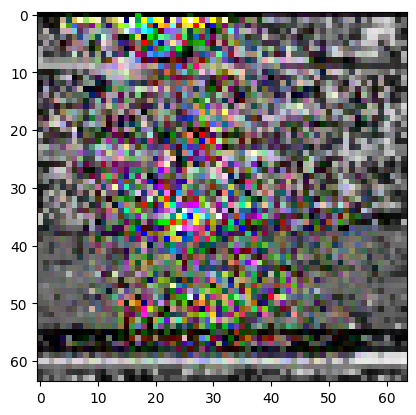

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from art.attacks.evasion import DeepFool
from art.estimators.classification import KerasClassifier
from scipy import ndimage  # Importar scipy para el suavizado de entradas
import matplotlib.pyplot as plt

# Deshabilitar la ejecución ansiosa en TensorFlow 2.x
tf.compat.v1.disable_eager_execution()

# Cargar el modelo
model = tf.keras.models.load_model('modelo_malware')

# Definir el path del dataset
path = r'.\malimg_dataset\malimg_paper_dataset_imgs'

# Cargar las imágenes del dataset
datagen = ImageDataGenerator(rescale=1./255)  # Normalizar las imágenes
familias = datagen.flow_from_directory(directory=path, target_size=(64,64), batch_size=10000, class_mode='categorical')

# Obtener las imágenes y etiquetas
imgs, labels = next(familias)

# Mapear las clases que queremos utilizar a sus respectivos índices
classes_to_keep = {'Adialer.C': 0, 'Agent.FYI': 1}

# Filtrar imágenes y etiquetas para las clases que queremos utilizar
indices_to_keep = np.isin(np.argmax(labels, axis=1), list(classes_to_keep.values()))
imgs_filtered = imgs[indices_to_keep]
labels_filtered = labels[indices_to_keep]

# Dividir el dataset filtrado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imgs_filtered, labels_filtered, test_size=0.3, random_state=42)

# Aplicar suavizado a las imágenes de prueba antes de generar las imágenes adversariales
X_test_smoothed = np.copy(X_test)
for i in range(X_test.shape[0]):
    X_test_smoothed[i] = ndimage.gaussian_filter(X_test[i], sigma=0.5)  # Aplicar suavizado gaussiano

# Crear el clasificador ART
classifier = KerasClassifier(model=model, clip_values=(0, 255))

# Realizar el ataque DeepFool
attack_deepfool = DeepFool(classifier=classifier, max_iter=100, epsilon=0.1)
X_test_adv_deepfool = attack_deepfool.generate(X_test_smoothed)

# Evaluar el modelo en las imágenes adversariales
_, acc_deepfool = model.evaluate(X_test_adv_deepfool, y_test)

print("Accuracy after DeepFool attack with input smoothing:", acc_deepfool)

# Visualizar una imagen adversarial
plt.imshow(X_test_adv_deepfool[0])
plt.show()


### Ataque 2: POISONING ATTACK BACKDOOR

### Categoria: Ataque por envenenamiento

### Defensa utilizada: 

Esta defensa sencilla contra el envenenamiento de datos filtra las imágenes envenenadas que tienen una etiqueta diferente a la etiqueta envenenada deseada antes de utilizarlas para entrenar el modelo, reduciendo así el impacto del envenenamiento en la capacidad del modelo para generalizar correctamente.

Las etiquetas objetivo para el envenenamiento son:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


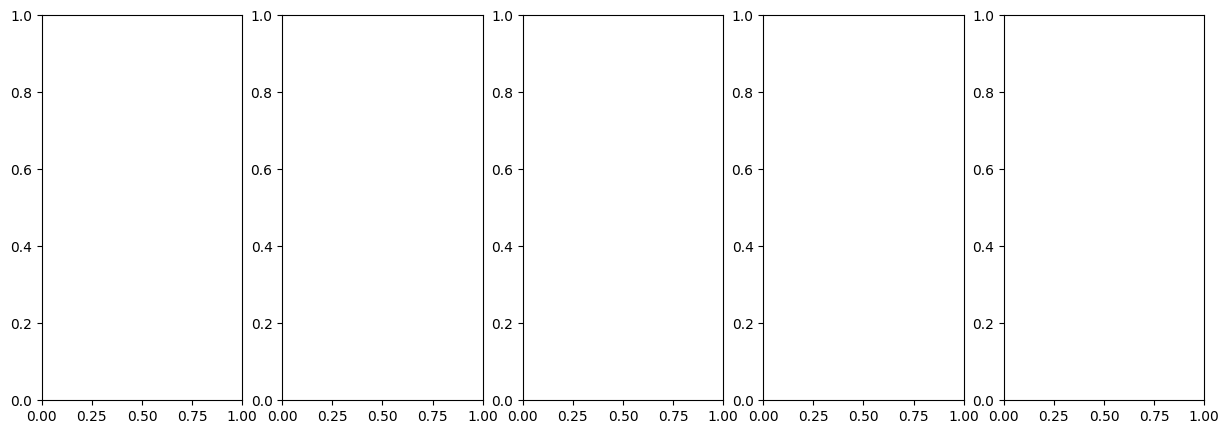

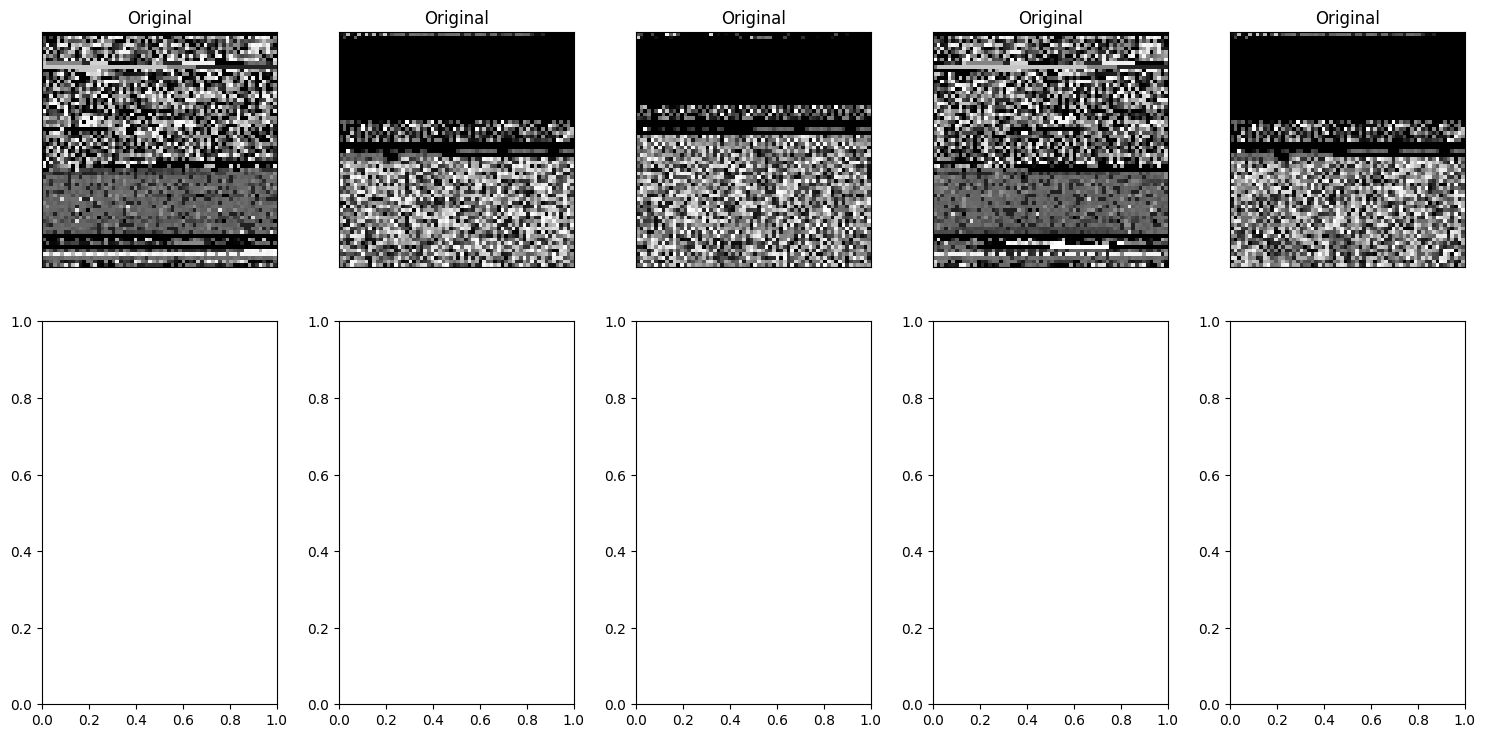

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from art.attacks.poisoning import PoisoningAttackBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd
from art.utils import to_categorical

# Crear ataque de envenenamiento
backdoor = PoisoningAttackBackdoor(perturbation=add_pattern_bd)

# Definir etiquetas objetivo para el envenenamiento
target = to_categorical(labels=np.repeat(a=5, repeats=5), nb_classes=10)

print(f"Las etiquetas objetivo para el envenenamiento son:\n {target}")

# Generar imágenes envenenadas y etiquetas
poisoned_images, poisoned_labels = backdoor.poison(x=X_train[:5], y=target)

# Filtrar imágenes envenenadas
clean_images = []
clean_labels = []
for i in range(len(poisoned_images)):
    if np.argmax(poisoned_labels[i]) != 5:  # Filtrar imágenes que no tienen la etiqueta envenenada
        clean_images.append(poisoned_images[i])
        clean_labels.append(poisoned_labels[i])

clean_images = np.array(clean_images)
clean_labels = np.array(clean_labels)

# Visualizar imágenes envenenadas
fig, axes = plt.subplots(nrows=1, ncols=5, squeeze=True, figsize=(15, 5))

for i in range(len(clean_images)):
    axes[i].imshow(X=clean_images[i])
    axes[i].set_title(label=f"Etiqueta: {np.argmax(clean_labels[i])}")
    axes[i].set_xticks(ticks=[])
    axes[i].set_yticks([])    

plt.show()

# Visualizar imágenes originales y envenenadas
fig, axes = plt.subplots(nrows=2, ncols=5, squeeze=True, figsize=(15, 8))

for i in range(5):
    axes[0, i].imshow(X_train[i])
    axes[0, i].set_title("Original")
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])

for i in range(len(clean_images)):
    axes[1, i].imshow(clean_images[i])
    axes[1, i].set_title("Envenenada")
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])

plt.tight_layout()
plt.show()
